In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
print(os.getcwd())
data_path = './Data Science Sample Dataset.xlsx'
df = pd.read_excel(data_path)

D:\Programming\Python\my-data-science-projects\PepTalk


In [3]:
df.head(5)

,company_id,user_id,fitness score,nutrition score,mindset score,total_score,exercise_per_week,exercise_minutes_per_week,how do you feel when you wake up,alcohol units per week,...,breakfast,energy on a typical day,age bracket,height cm,gender,body mass index (BMI),courses_completed,app_version,device_type,total steps
0,COMPANY1,3522,28,34,27,89,No Exercise,<30,Good,7,...,Yes,Low,Below 24,120,Not Answered,25,47,3.2.0,Android,285548
1,COMPANY2,28,46,25,26,97,5-6 days,<60,Good,2,...,Coffee Only,Low,Above 55,165,Female,18,169,3.2.0,Android,3800054
2,COMPANY3,63,27,16,44,87,1-2 days,<90,Excelent,4,...,Coffee Only,Medium,35 to 44,168,Female,24,526,3.1.0,iOS,1881917
3,COMPANY1,4464,49,52,35,136,5-6 days,<60,Good,0,...,Yes,Medium,25 to 34,163,Female,24,3,3.2.0,Android,434067
4,COMPANY4,55,52,31,54,137,5-6 days,<150,Excelent,5,...,Yes,Full Energy,Below 24,180,Male,26,1,3.2.0,Android,80055


In [4]:
df.info() # get information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   company_id                        2000 non-null   object
 1   user_id                           2000 non-null   int64 
 2   fitness score                     2000 non-null   int64 
 3   nutrition score                   2000 non-null   int64 
 4   mindset score                     2000 non-null   int64 
 5   total_score                       2000 non-null   int64 
 6   exercise_per_week                 2000 non-null   object
 7   exercise_minutes_per_week         2000 non-null   object
 8   how do you feel when you wake up  2000 non-null   object
 9   alcohol units per week            2000 non-null   int64 
 10  weight KG                         2000 non-null   int64 
 11  balanced meals per day            2000 non-null   object
 12  how are you getting_

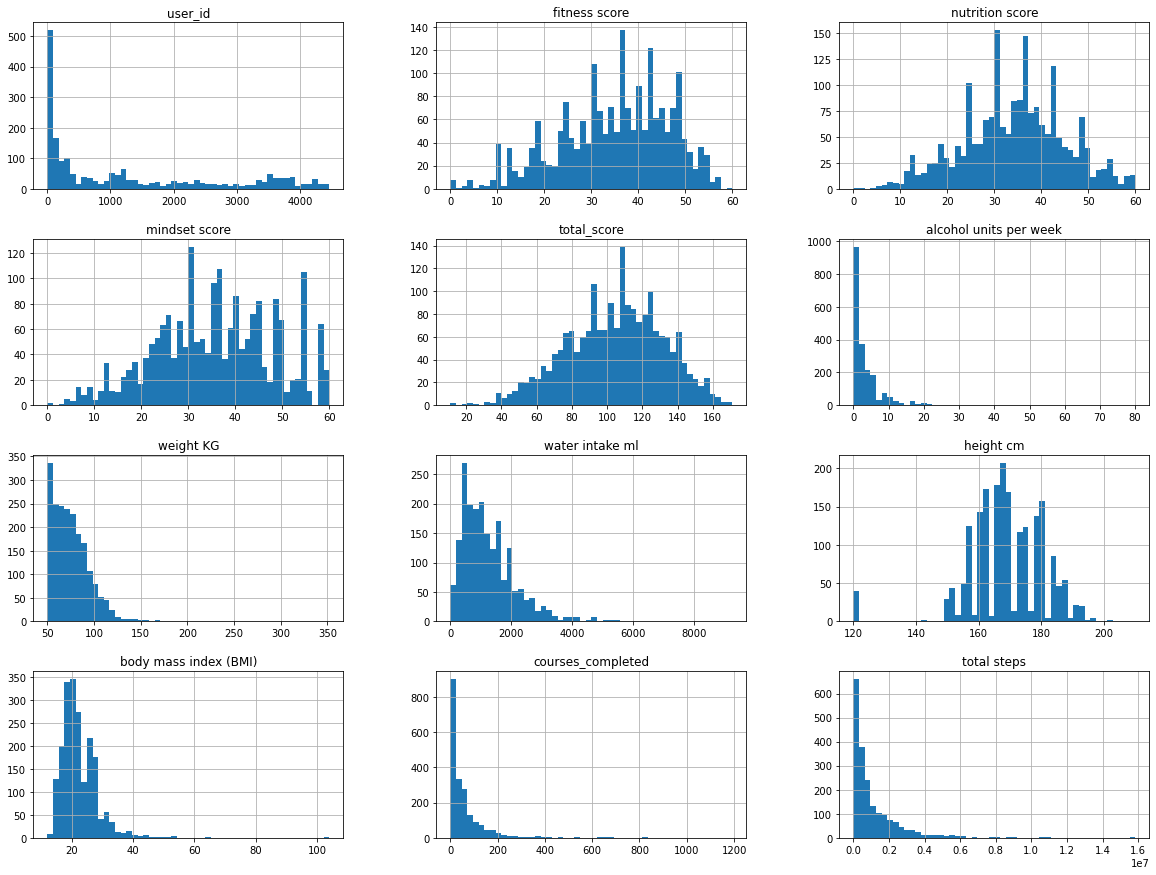

In [5]:
# ploting histogram for each numerical attributes to get feel of data

df.hist(bins=50, figsize=(20,15))
plt.show()
# it shows number of instances on vertical axis and value range in horizontal axis

In [6]:
# setting up a copy of data aside
new_raw_df = df.copy()
# removing unnecessary colums
removed_cols = ["user_id", "app_version"]
new_raw_df.drop(labels=removed_cols, axis = 1, inplace=True)

In [7]:
new_raw_df.corr()

,fitness score,nutrition score,mindset score,total_score,alcohol units per week,weight KG,water intake ml,height cm,body mass index (BMI),courses_completed,total steps
fitness score,1.000000,0.336261,0.505457,0.795249,-0.056017,-0.074394,0.041307,0.090467,-0.103886,0.070512,0.156178
nutrition score,0.336261,1.000000,0.358710,0.706662,-0.220454,-0.365557,0.325477,-0.122094,-0.356185,0.089339,0.049706
mindset score,0.505457,0.358710,1.000000,0.820525,-0.043706,-0.078120,0.056898,0.063603,-0.099067,0.133863,0.108028
total_score,0.795249,0.706662,0.820525,1.000000,-0.131700,-0.213067,0.173183,0.019641,-0.231650,0.127465,0.136509
alcohol units per week,-0.056017,-0.220454,-0.043706,-0.131700,1.000000,0.104289,0.115067,0.153052,0.065248,0.018102,0.067795
weight KG,-0.074394,-0.365557,-0.078120,-0.213067,0.104289,1.000000,0.119295,0.376141,0.955151,-0.054181,0.025843
water intake ml,0.041307,0.325477,0.056898,0.173183,0.115067,0.119295,1.000000,-0.013052,0.133692,0.023838,-0.022976
height cm,0.090467,-0.122094,0.063603,0.019641,0.153052,0.376141,-0.013052,1.000000,0.100175,-0.057993,0.056630
body mass index (BMI),-0.103886,-0.356185,-0.099067,-0.231650,0.065248,0.955151,0.133692,0.100175,1.000000,-0.044610,0.011241
courses_completed,0.070512,0.089339,0.133863,0.127465,0.018102,-0.054181,0.023838,-0.057993,-0.044610,1.000000,0.408204


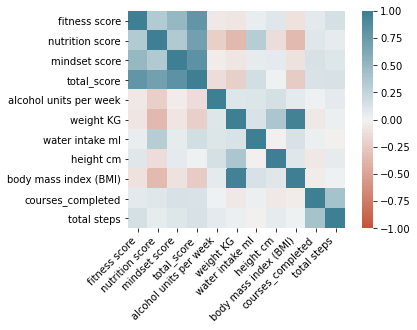

In [8]:
c = new_raw_df.corr()
ax = sns.heatmap(
    c, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [9]:
# checking null values in dataframe
new_raw_df.isna().sum()
# dropping null rows from data frame due to very low no of rows

company_id                          0
fitness score                       0
nutrition score                     0
mindset score                       0
total_score                         0
exercise_per_week                   0
exercise_minutes_per_week           0
how do you feel when you wake up    0
alcohol units per week              0
weight KG                           0
balanced meals per day              0
how are you getting_on              0
smoker                              0
sleep_hours                         0
eat fruit and veg                   0
water intake ml                     0
how do you feel overall?            1
breakfast                           3
energy on a typical day             5
age bracket                         0
height cm                           0
gender                              0
body mass index (BMI)               0
courses_completed                   0
device_type                         0
total steps                         0
dtype: int64

In [10]:
# cleaned df
new_cleaned_df = new_raw_df.dropna()

In [11]:
# get categorical columns
categorical_cols = new_cleaned_df.select_dtypes(include=["object"]).drop(labels=["company_id"], axis=1).columns.tolist()
int_cols = new_cleaned_df.select_dtypes(include=["int64"]).columns.tolist()

In [12]:
categorical_cols

['exercise_per_week',
 'exercise_minutes_per_week',
 'how do you feel when you wake up',
 'balanced meals per day',
 'how are you getting_on',
 'smoker',
 'sleep_hours',
 'eat fruit and veg',
 'how do you feel overall?',
 'breakfast',
 'energy on a typical day',
 'age bracket',
 'gender',
 'device_type']

In [13]:
int_cols

['fitness score',
 'nutrition score',
 'mindset score',
 'total_score',
 'alcohol units per week',
 'weight KG',
 'water intake ml',
 'height cm',
 'body mass index (BMI)',
 'courses_completed',
 'total steps']

In [14]:
for cat in categorical_cols:
    print(f"{cat}:\n{new_raw_df[cat].value_counts()}")

exercise_per_week:
3-4 days            700
1-2 days            467
5-6 days            453
7 days              227
No Exercise         120
What's Exercise?     33
Name: exercise_per_week, dtype: int64
exercise_minutes_per_week:
<30         622
<60         590
<90         285
Over 150    205
<120        197
<150        101
Name: exercise_minutes_per_week, dtype: int64
how do you feel when you wake up:
Good        811
Excelent    686
Not Good    306
Sad         196
10            1
Name: how do you feel when you wake up, dtype: int64
balanced meals per day:
2 Meals    854
#ERROR!    735
1 Meals    364
0 Meals     47
Name: balanced meals per day, dtype: int64
how are you getting_on:
Coping                  1040
Managing it all well     689
Overwhelmed              231
Underwhelmed              40
Name: how are you getting_on, dtype: int64
smoker:
No                  1661
Yes                  185
Maybe Socially..     151
3                      2
4                      1
Name: smoker, dtype:

In [15]:
# encoding categorical features
# https://medium.com/@urvashilluniya/convert-multiple-categorical-columns-into-numeric-columns-in-single-line-of-code-577bab825635
# https://towardsdatascience.com/i-have-data-i-need-insights-where-do-i-start-7ddc935ab365
# ord_encoder = OrdinalEncoder()
# df_cat_enc = new_raw_df[categorical_cols].apply(lambda col: ord_encoder.fit_transform(col))
# df_cat_enc = pd.get_dummies(new_raw_df, columns=categorical_cols).drop(labels=["company_id"], axis=1)
#df_only_cat_enc = df_cat_enc.drop(labels = int_cols, axis=1, inplace=True)
# df_cat_enc.corr()

for cat in categorical_cols:
    new_raw_df[cat] = new_raw_df[cat].astype('category')

for new_cat in categorical_cols:
    new_raw_df[new_cat+"_cat"] = new_raw_df[new_cat].cat.codes

df_cat_enc = new_raw_df.copy()
df_cat_enc.drop(labels=categorical_cols, axis=1, inplace=True)
#df_cat_enc_.head(5)
#df_cat_enc_.info()
df_cat_enc.corr()
# new_raw_df.dtypes
 #'exercise_minutes_per_week',
 #'how do you feel when you wake up',
 #'balanced meals per day',
 #'how are you getting_on',
 #'smoker',
 #'sleep_hours',
 #'eat fruit and veg',
 #'how do you feel overall?',
 #'breakfast',
 #'energy on a typical day',
 #'age bracket',
 #'gender',
 #'device_type'



,fitness score,nutrition score,mindset score,total_score,alcohol units per week,weight KG,water intake ml,height cm,body mass index (BMI),courses_completed,...,how are you getting_on_cat,smoker_cat,sleep_hours_cat,eat fruit and veg_cat,how do you feel overall?_cat,breakfast_cat,energy on a typical day_cat,age bracket_cat,gender_cat,device_type_cat
fitness score,1.000000,0.336261,0.505457,0.795249,-0.056017,-0.074394,0.041307,0.090467,-0.103886,0.070512,...,-0.003506,-0.143983,0.025752,-0.129077,-0.269404,0.223477,-0.147156,0.095302,0.082446,0.088864
nutrition score,0.336261,1.000000,0.358710,0.706662,-0.220454,-0.365557,0.325477,-0.122094,-0.356185,0.089339,...,0.024792,-0.059117,0.107448,-0.298578,-0.247106,0.573418,-0.143444,0.055107,-0.099038,-0.110949
mindset score,0.505457,0.358710,1.000000,0.820525,-0.043706,-0.078120,0.056898,0.063603,-0.099067,0.133863,...,-0.046144,-0.034325,0.147844,-0.183619,-0.492211,0.219357,-0.305384,0.098982,0.099569,0.066706
total_score,0.795249,0.706662,0.820525,1.000000,-0.131700,-0.213067,0.173183,0.019641,-0.231650,0.127465,...,-0.012956,-0.101004,0.121929,-0.258596,-0.440711,0.424656,-0.260949,0.108396,0.041958,0.024812
alcohol units per week,-0.056017,-0.220454,-0.043706,-0.131700,1.000000,0.104289,0.115067,0.153052,0.065248,0.018102,...,-0.012416,0.058533,-0.040360,0.048457,0.031607,-0.061881,0.062351,0.043896,0.155885,-0.104452
weight KG,-0.074394,-0.365557,-0.078120,-0.213067,0.104289,1.000000,0.119295,0.376141,0.955151,-0.054181,...,-0.003233,0.019290,-0.048356,0.037399,0.119373,-0.037701,0.018205,-0.027475,0.244640,-0.061552
water intake ml,0.041307,0.325477,0.056898,0.173183,0.115067,0.119295,1.000000,-0.013052,0.133692,0.023838,...,0.028456,0.041742,0.040972,-0.071980,-0.034468,0.018981,-0.018057,-0.070017,0.031197,-0.437944
height cm,0.090467,-0.122094,0.063603,0.019641,0.153052,0.376141,-0.013052,1.000000,0.100175,-0.057993,...,0.006067,-0.001983,-0.083728,-0.001711,-0.038904,-0.011982,-0.017299,-0.137445,0.108614,0.045692
body mass index (BMI),-0.103886,-0.356185,-0.099067,-0.231650,0.065248,0.955151,0.133692,0.100175,1.000000,-0.044610,...,-0.006891,0.020715,-0.022659,0.038466,0.138857,-0.036998,0.023716,0.024876,0.253929,-0.077594
courses_completed,0.070512,0.089339,0.133863,0.127465,0.018102,-0.054181,0.023838,-0.057993,-0.044610,1.000000,...,0.022520,0.025335,-0.009342,-0.065074,-0.055855,0.039675,-0.031394,0.029718,-0.055937,0.001897


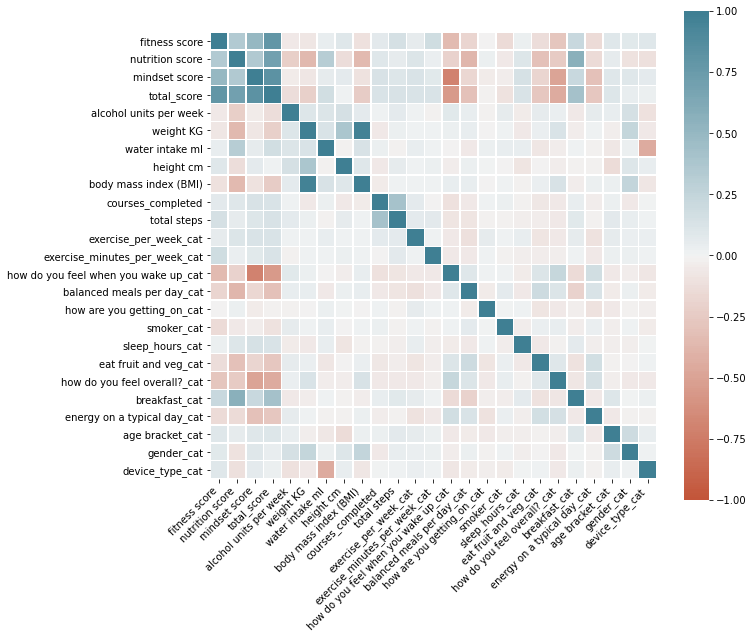

In [16]:
c = df_cat_enc.corr()
f, ax = plt.subplots(figsize=(10, 9))
ax = sns.heatmap(
    c, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [17]:
# df_cat_enc.plot(kind='bar', stacked=True, figsize=(20, 10), edgecolor='None')
# plt.show()

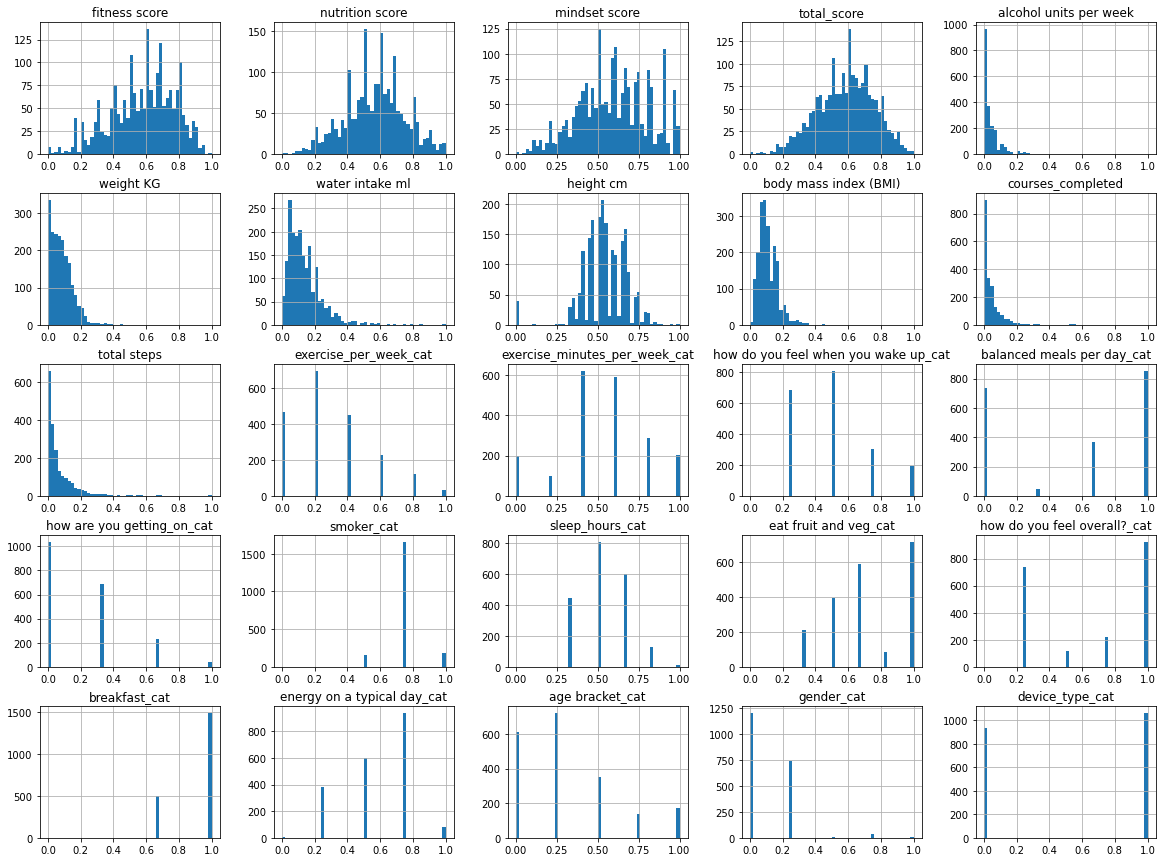

In [18]:
scaler = MinMaxScaler()
df_cat_enc.drop(labels=['company_id'], axis=1, inplace=True)
_cols = df_cat_enc.columns.tolist()
# print(len(_cols))
# _cols.remove('company_id')
# # print(len(_cols))
df_scaled = scaler.fit_transform(df_cat_enc.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=_cols)
# df_scaled.info()
df_scaled.hist(bins=50, figsize=(20,15))
plt.show()

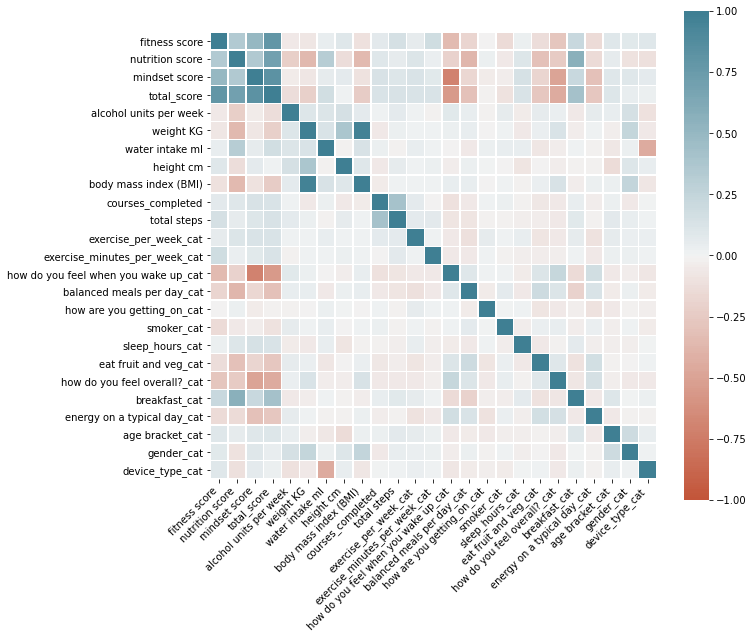

In [19]:
c = df_scaled.corr()
f, ax = plt.subplots(figsize=(10, 9))
ax = sns.heatmap(
    c, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [27]:
# df_scaled.plot(kind='bar', stacked=True, figsize=(20, 10), edgecolor='None')
df_scaled['total_score']
df_scaled['gender_cat']
# df_scaled.groupby(['gender_cat', 'total_score'])['total_score'].count().plot(kind='bar', stacked=False)
# plt.show()

0       0.75
1       0.00
2       0.00
3       0.00
4       0.25
        ... 
1995    0.00
1996    0.00
1997    0.00
1998    0.00
1999    0.25
Name: gender_cat, Length: 2000, dtype: float64